In [1]:
%matplotlib inline
from pylab import imshow
import numpy as np
import cv2
import torch
import albumentations as albu

In [2]:
!pip install iglovikov_helper_functions
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 2.1 MB 41.4 MB/s 


In [3]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null
!pip install people_segmentation  > /dev/null
from people_segmentation.pre_trained_models import create_model

--2021-11-18 12:47:36--  https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving habrastorage.org (habrastorage.org)... 82.192.95.170
Connecting to habrastorage.org (habrastorage.org)|82.192.95.170|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://hsto.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg [following]
--2021-11-18 12:47:37--  https://hsto.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving hsto.org (hsto.org)... 172.67.71.175, 104.26.12.161, 104.26.13.161, ...
Connecting to hsto.org (hsto.org)|172.67.71.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55211 (54K) [image/jpeg]
Saving to: ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’

eml7crxnxftrimsmolw 100%[===================>]  53.92K  --.-KB/s    in 0.001s  

2021-11-18 12:47:37 (77.6 MB/s) - ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’ saved [55211/55211]



In [4]:
model = create_model("Unet_2020-07-20")
model.eval();

Downloading: "https://github.com/ternaus/people_segmentation/releases/download/0.0.1/2020-09-23a.zip" to /root/.cache/torch/hub/checkpoints/2020-09-23a.zip


  0%|          | 0.00/47.0M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:513: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from google.colab import drive
from keras.preprocessing import image
drive.mount('/content/gdrive')
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)
train_generator = data_generator.flow_from_directory(
    '/content/gdrive/My Drive/100개 연습',
    target_size=(128,128),
    batch_size=1,
    class_mode="categorical"
)

Mounted at /content/gdrive


FileNotFoundError: ignored

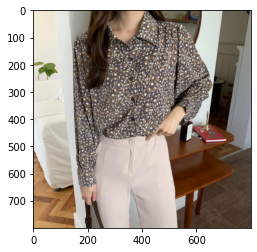

In [8]:
#동작 확인 1
image = load_rgb('/content/gdrive/MyDrive/최종 분류/보헤미안/1003170.jpg')

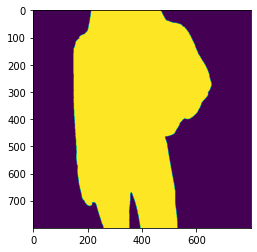

In [9]:
#동작 확인 2
transform = albu.Compose([albu.Normalize(p=1)], p=1)
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
with torch.no_grad():
  prediction = model(x)[0][0]
mask = (prediction > 0).cpu().numpy().astype(np.uint8)
mask = unpad(mask, pads)

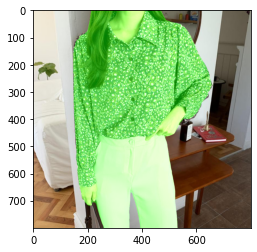

In [10]:
#동작 확인 3
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)
imshow(dst)

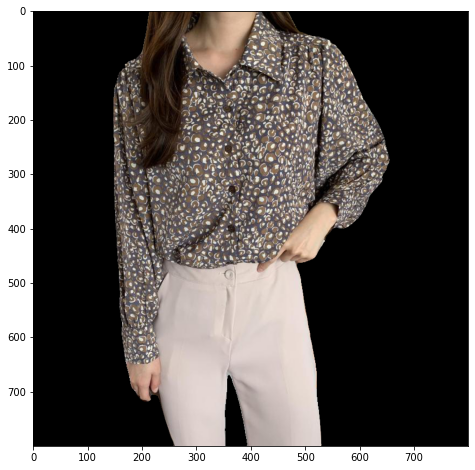

In [13]:
mask=mask.reshape(mask.shape[0],mask.shape[1],1)
import skimage.io
for i in range(mask.shape[2]):
    temp = skimage.io.imread('/content/gdrive/MyDrive/최종 분류/보헤미안/1003170.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
skimage.io.imsave('/content/gdrive/My Drive/100개 연습/모던_크롭/모던_crop_'+str(n+1)+'.jpg',temp)

In [ ]:
#실전_이미지 로드
from PIL import Image
import os, os.path
import skimage.io
from tqdm import tqdm

imgs = []
path = "/content/gdrive/My Drive/100개 연습/모던/"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(np.array(Image.open(os.path.join(path,f))))

In [ ]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)
n = 0
for each_img in tqdm(imgs):
  padded_image, pads = pad(each_img, factor=32, border=cv2.BORDER_CONSTANT)
  x = transform(image=padded_image)["image"]
  x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
  with torch.no_grad():
    prediction = model(x)[0][0]
  mask = (prediction > 0).cpu().numpy().astype(np.uint8)
  mask = unpad(mask, pads)
  #imshow(mask)
  mask=mask.reshape(mask.shape[0],mask.shape[1],1)
  for i in range(mask.shape[2]):
    temp = each_img
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    #plt.figure(figsize=(8,8))
    #plt.imshow(temp)
    skimage.io.imsave('/content/gdrive/My Drive/100개 연습/모던_크롭/모던_crop_'+str(n+1)+'.jpg',temp)
    n += 1

100%|██████████| 100/100 [04:08<00:00,  2.49s/it]
